In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
# plot as histogram and boxplot
def plot(data_set: pd.DataFrame, title: str ,out: str):
    idle = data_set['browser_isolated_idle'].to_numpy()
    maximum_normal = data_set['browser_isolated_maximum_normal'].to_numpy()
    busy_abovenormal = data_set['browser_isolated_busy_abovenormal'].to_numpy()
    medium_abovenormal = data_set['browser_isolated_medium_abovenormal'].to_numpy()

    
    assert len(idle) == len(busy_abovenormal) == len(maximum_normal) == len(medium_abovenormal)
    data_len = len(idle)

    # throw away outlier (the lower and upper 5%)
    ten_perc = int(data_len * 0.05)

    idle.sort()
    idle = idle[ten_perc:-ten_perc]
    len_idle = len(idle)
    idle_min = idle.min()
    idle_max = idle.max()

    busy_abovenormal.sort()
    busy_abovenormal = busy_abovenormal[ten_perc:-ten_perc]
    len_busy_abovenormal = len(busy_abovenormal)
    busy_abovenormal_min = busy_abovenormal.min()
    busy_abovenormal_max = busy_abovenormal.max()

    maximum_normal.sort()
    maximum_normal = maximum_normal[ten_perc:-ten_perc]
    len_maximum_normal = len(maximum_normal)
    maximum_normal_min = maximum_normal.min()
    maximum_normal_max = maximum_normal.max()

    medium_abovenormal.sort()
    medium_abovenormal = medium_abovenormal[ten_perc:-ten_perc]
    len_medium_abovenormal = len(medium_abovenormal)
    medium_abovenormal_min = medium_abovenormal.min()
    medium_abovenormal_max = medium_abovenormal.max()

    min = np.array([idle_min, busy_abovenormal_min, maximum_normal_min, medium_abovenormal_min]).min()
    max = np.array([idle_max, busy_abovenormal_max, maximum_normal_max, medium_abovenormal_max]).max()

    assert len_idle == len_busy_abovenormal == len_maximum_normal == len_medium_abovenormal

    #bins = np.arange(round(min,0), round(max,0), step=0.5)

    # check for mircoseconds (step 0.1)
    #ticks = np.arange(round(min, 0), round(max, 0), step=1)

    # plot as histogram
    plt.hist(x=idle, color='blue' , alpha=1, rwidth=0.6 )#, bins=bins )
    plt.hist(x=busy_abovenormal, color='red', alpha=1, rwidth=0.6 )#, bins=bins )
    plt.hist(x=maximum_normal, color='green' , alpha=1, rwidth=0.6 )#, bins=bins )
    plt.hist(x=medium_abovenormal, color='yellow', alpha=1, rwidth=0.6 )#, bins=bins )

    handles = [Rectangle((0,0),1,1, color=c,ec="k") for c in ["blue", "red" ,"green", "yellow"]]
    labels= ["idle","busy_abovenormal", "maximum_normal", "medium_abovenormal"]
    plt.legend(handles, labels)

    plt.grid(axis='y', alpha=0.5)
    plt.title(f'Timestamp samples (target: 100ms) - {title}')
    plt.ylabel('Number of Occurrences')
    plt.xlabel('Distance to last Timestamp (ms)')
    #plt.xticks(ticks, fontsize=14)
    plt.tight_layout()
    plt.savefig(out, bbox_inches="tight", pad_inches=0.3)
    plt.show()

# plot boxplot
def boxplot(data_set: pd.DataFrame,out:str):
    
    colums = data_set.columns.to_list()
    ax = data_set[colums[0:4]].plot(
        kind='box', title='boxplot', showmeans=True, showfliers=False)

    ax.tick_params(axis='x', rotation=30 ,labelsize=14)
    plt.setp(ax.get_xticklabels(), horizontalalignment='right')
    plt.tight_layout()
    plt.title(f"Browser timestamp precision (target: 100ms)", fontsize=18)
    plt.ylabel("Difference in sec", fontsize=18)
    plt.xlabel("Datapoints", fontsize=18)
    plt.tight_layout()
    plt.savefig(out ,bbox_inches="tight", pad_inches=0.3,)
    plt.show()

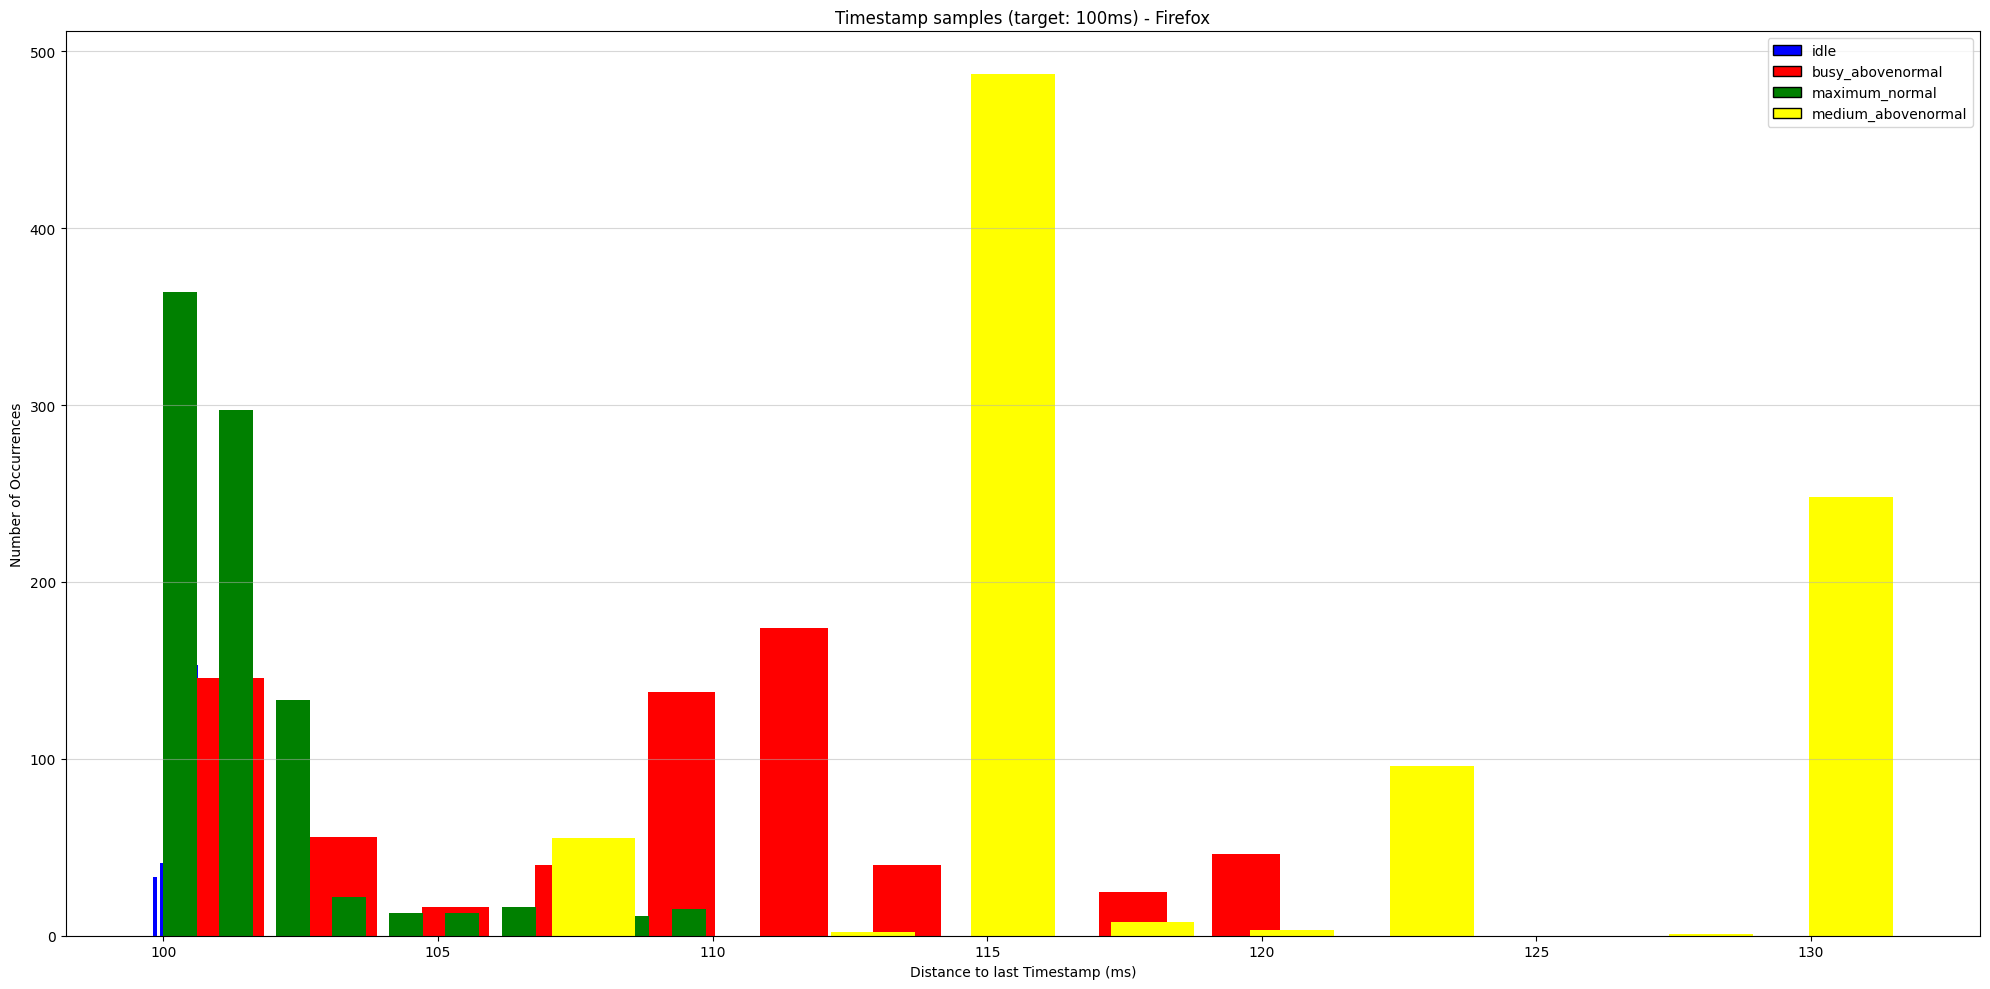

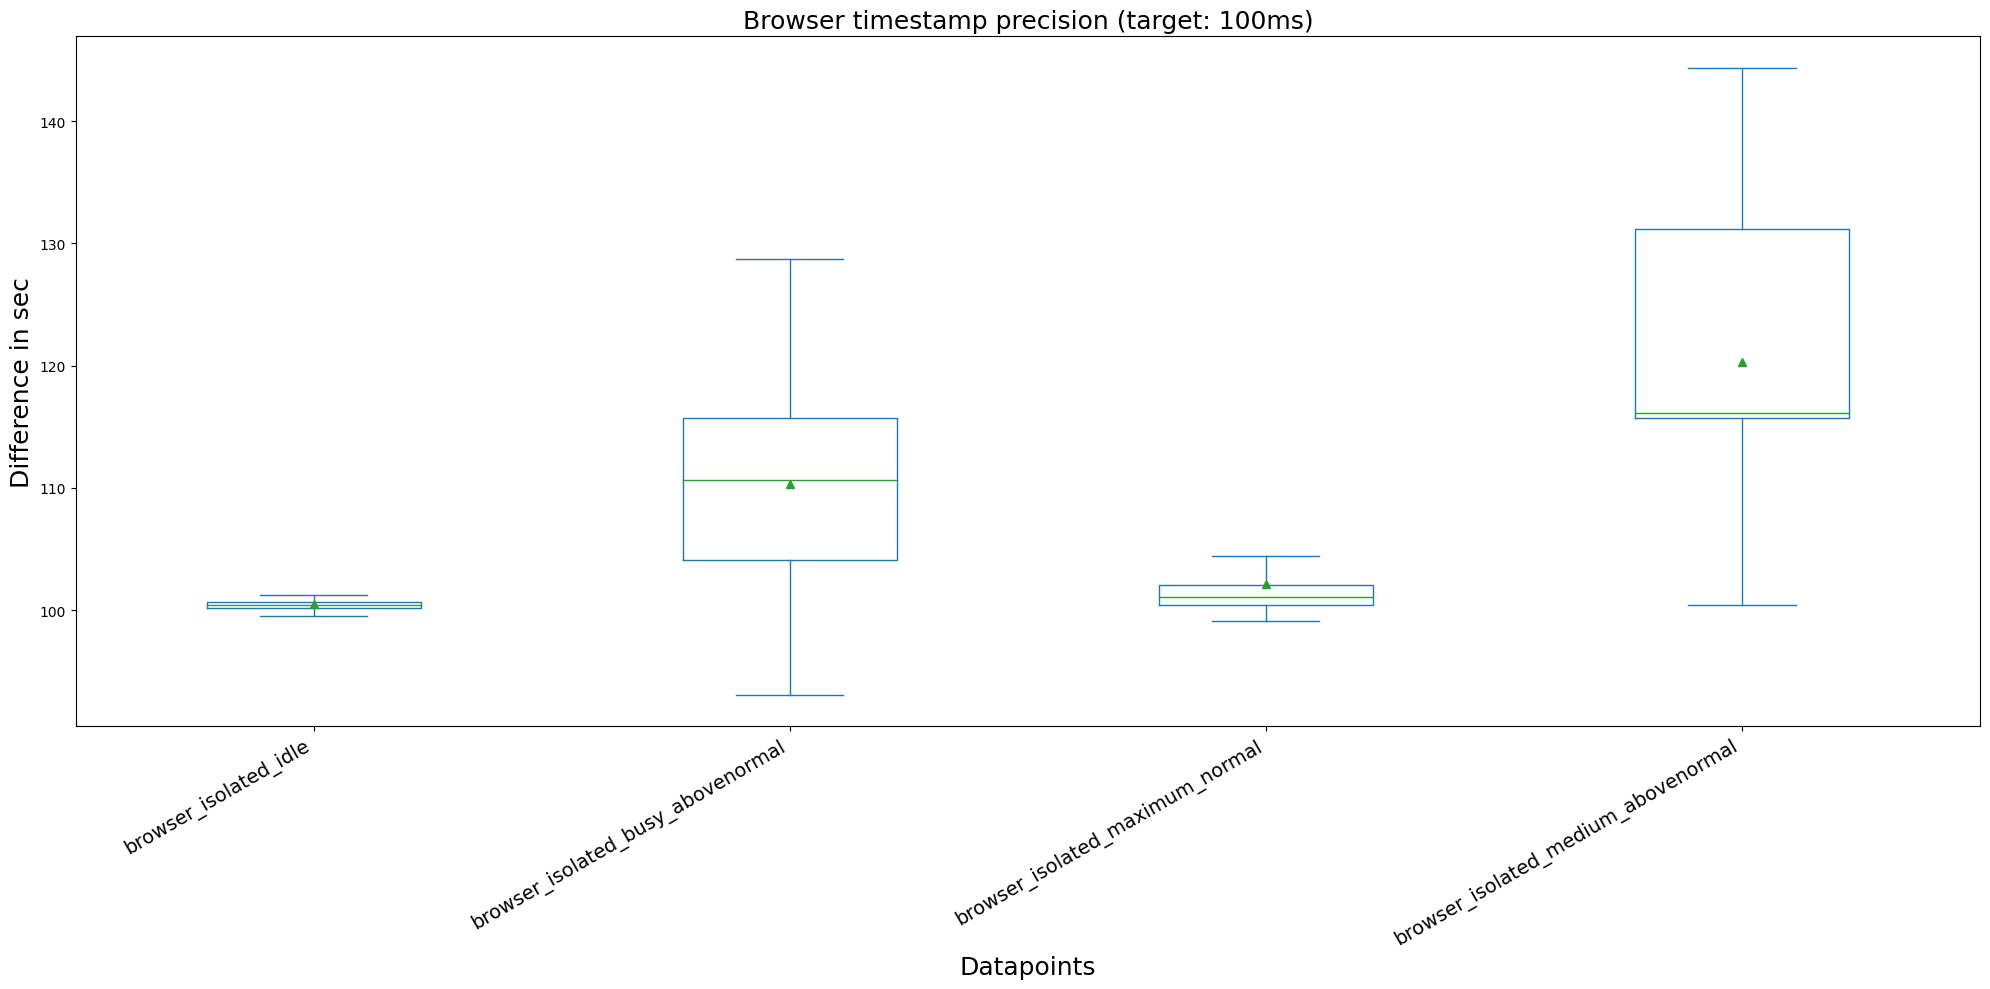

In [5]:
# firefox stresstest
firefox = pd.read_csv("./firefox_stresstest/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot(firefox, "Firefox","./firefox_stresstest/hist.jpg")
boxplot(firefox, "./firefox_stresstest/box.jpg")